In [2]:
import xarray as xr

In [5]:
import pandas as pd

In [113]:
from matplotlib import pyplot as plt

In [249]:
a = [
    [  #  01   02   03   04
        [ 10,  20,  30, 900],  # A \
        [ 40,  50,  60, 800],  # B  f1
        [ 70,  80,  90, 750],  # C /
    ],
    [
        [110, 120, 130, 700],  # A \
        [140, 150, 160, 600],  # B  f2
        [170, 180, 190, 500],  # C /
    ],
    [
        [210, 220, 230, 400],  # A \
        [240, 250, 260, 300],  # B  f3
        [270, 280, 290, 200],  # C /
    ],
    [
        [1210, 1220, 1230, 1400],  # A \
        [1240, 1250, 1260, 1300],  # B  f4
        [1270, 1280, 1290, 1200],  # C /
    ],
    [
        [3210, 3220, 3230, 3400],  # A \
        [3240, 3250, 3260, 3300],  # B  f5
        [3270, 3280, 3290, 50],  # C /
    ],
]

In [191]:
a[0][0]

[100, 112, 113]

In [230]:
times = pd.date_range("01-12-2019", periods=4)
names = ["A", "B", "C"]
funcs = ["f1", "f2", "f3", "f4", "f5"]

In [244]:
times

DatetimeIndex(['2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15'], dtype='datetime64[ns]', freq='D')

In [250]:
x = xr.DataArray(a, coords=[funcs, names, times], dims=["func", "name", "date"])

In [195]:
x.attrs['long_name'] = "cumulative number of COVID-19 cases"

In [196]:
x.attrs["units"] = "day"

In [197]:
x.loc[:,:,"f2"]

<xarray.DataArray (date: 3, name: 3)>
array([[112, 122, 132],
       [212, 222, 232],
       [312, 322, 332]])
Coordinates:
  * date     (date) datetime64[ns] 2019-01-12 2019-01-13 2019-01-14
  * name     (name) <U1 'A' 'B' 'C'
    func     <U2 'f2'
Attributes:
    long_name:  cumulative number of COVID-19 cases
    units:      day

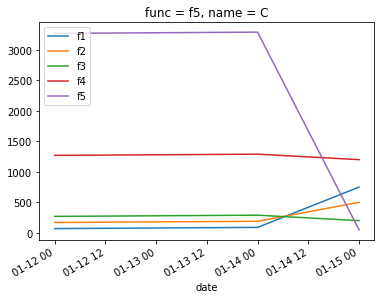

In [251]:
x.sel(name="C", func="f1").plot(label="f1")
x.sel(name="C", func="f2").plot(label="f2")
x.sel(name="C", func="f3").plot(label="f3")
x.sel(name="C", func="f4").plot(label="f4")
x.sel(name="C", func="f5").plot(label="f5")
plt.legend(loc=2)

In [135]:
x.sel(date="2019-01-12").to_dataframe(name="cases")

date  cases
name func                  
A    f1   2019-01-12    111
     f2   2019-01-12    112
     f3   2019-01-12    113
B    f1   2019-01-12    121
     f2   2019-01-12    122
     f3   2019-01-12    123
C    f1   2019-01-12    131
     f2   2019-01-12    132
     f3   2019-01-12    133

In [96]:
x.sel(name="A", func="f2").values

array([112, 212, 312])

In [98]:
x.sel(date="2019-01-12", func="f2")

<xarray.DataArray (name: 3)>
array([112, 122, 132])
Coordinates:
    date     datetime64[ns] 2019-01-12
  * name     (name) <U1 'A' 'B' 'C'
    func     <U2 'f2'

In [141]:
df = x.to_dataframe(name="cases")

In [149]:
df

cases
date       name func       
2019-01-12 A    f1      111
                f2      112
                f3      113
           B    f1      121
                f2      122
                f3      123
           C    f1      131
                f2      132
                f3      133
2019-01-13 A    f1      211
                f2      212
                f3      213
           B    f1      221
                f2      222
                f3      223
           C    f1      231
                f2      232
                f3      233
2019-01-14 A    f1      311
                f2      312
                f3      313
           B    f1      321
                f2      322
                f3      323
           C    f1      331
                f2      332
                f3      333

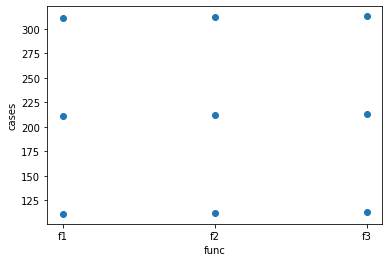

In [180]:
df.to_xarray().sel(name="A").plot.scatter(x="func", y="cases")

In [183]:
x.to_netcdf("test.nc")

In [184]:
y = xr.open_dataarray("test.nc")

In [186]:
y.sel(func="f1")

<xarray.DataArray (date: 3, name: 3)>
array([[111, 121, 131],
       [211, 221, 231],
       [311, 321, 331]], dtype=int32)
Coordinates:
    func     <U2 'f1'
  * name     (name) object 'A' 'B' 'C'
  * date     (date) datetime64[ns] 2019-01-12 2019-01-13 2019-01-14
Attributes:
    long_name:  cumulative number of COVID-19 cases
    units:      day